# 연습문제


## numpy

python에서 array등을 다루는 수학/과학 컴퓨팅을 하기 위한 패키지

## matplotlib

python에서 matlab과 유사한 그래프 표시를 가능하게 하는 패키지

In [1]:
# Cell 클릭 후 Shift+Enter로 실행 (Comment는 #으로 시작)

# Install necessary packages
!pip install numpy
!pip install matplotlib

## numpy
(본 cell은 markdown 형식으로, 더블클릭/Enter로 들어가고 Shift+Enter로 나갈 수 있다. 주석 용으로 사용.)  

python에서 과학 컴퓨팅을 하기 위해 사용하는 패키지로 python 라이브러리로 Import 하여 사용.

In [2]:
# 패키지 사용을 위한 약자 지정

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Lab_1: Perceptron
---
Perceptron 알고리즘 구현하기
아래 이름, 학번을 작성하세요.

In [3]:
lab1_student_id = '20191571'
lab1_student_name = '김세영'

## Practice 1

아래의 train_perceptron 알고리즘을 구현하시오.

```np.random.seed``` 

random number(난수) 발생을 위한 조건 설정. 괄호 안의 숫자에 따라 난수 생성 방식이 다르게 고정됨

(https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.seed.html)



In [4]:
# Do not change
np.random.seed(6)

seed(5)에서는 항상 min epoch값이 1이나와 6으로 조정하였습니다.

```np.random.multivariate_normal```

multivariate normal distribution 으로부터 random sample 을 추출

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [5]:
num_data = 20

# feature dataset

class_zeros = np.random.multivariate_normal(mean=[0, 0], cov=[[1., .95],[.95, 1.]], size=num_data)
class_ones = np.random.multivariate_normal(mean=[1, 5], cov=[[1., .85],[.85, 1.]], size=num_data)

print(f'class_zeros: \n{class_zeros} \nclass_ones: \n{class_ones}')

class_zeros: 
[[ 0.19259607  0.42312735]
 [-0.0729219  -0.35723969]
 [ 2.3111014   2.59989689]
 [-0.8734871  -1.35228542]
 [-1.5506981  -1.6866424 ]
 [-2.69333782 -2.50302492]
 [ 0.13595298  0.52736006]
 [-0.13015088 -0.08930967]
 [-0.05064208 -0.09969791]
 [-0.75442316 -0.49807154]
 [-0.63694112 -0.06374974]
 [ 1.41271919  1.26610589]
 [-0.62827028 -1.00029058]
 [-1.65749833 -1.43212119]
 [ 0.09426533  0.26319406]
 [ 0.81353546  0.34493231]
 [-0.99558124 -0.69734716]
 [-0.10953021 -0.11647352]
 [ 2.23231835  1.96845554]
 [ 0.42269974  0.49660552]] 
class_ones: 
[[-0.18977849  3.52561004]
 [ 1.48862184  6.01203077]
 [ 1.4967012   4.74708109]
 [ 0.06293928  3.5932664 ]
 [ 1.82304648  5.25696432]
 [ 0.3609054   4.94898489]
 [ 1.25259915  5.46969861]
 [ 0.81351611  6.09332891]
 [-0.28225948  3.3915938 ]
 [ 0.23447622  4.74923946]
 [ 0.7976417   4.38238199]
 [ 0.95711445  5.35520466]
 [ 0.80754522  4.33824413]
 [ 0.8480308   4.29228521]
 [ 3.00318861  7.09841734]
 [-0.03585466  4.20618251]

```np.vstack, np.hstack```

배열을 각각 vertically, horizontally stacking 함


https://numpy.org/doc/stable/reference/generated/numpy.vstack.html?highlight=vstack#numpy.vstack

https://numpy.org/doc/stable/reference/generated/numpy.hstack.html?highlight=hstack#numpy.hstack

In [6]:
biases = np.ones((2 * num_data, 1))

class_data = np.vstack((class_zeros, class_ones)).astype(np.float32)

features = np.hstack((biases, class_data))

print(f'biases: \n{biases} \nclass_data: \n{class_data} \nfeatures: \n{features}')
print(f'biases.shape: \n{biases.shape} \nclass_data.shape: \n{class_data.shape} \
\nfeatures.shape: \n{features.shape}')

biases: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
class_data: 
[[ 0.19259606  0.42312735]
 [-0.0729219  -0.3572397 ]
 [ 2.3111014   2.599897  ]
 [-0.8734871  -1.3522854 ]
 [-1.5506982  -1.6866424 ]
 [-2.693338   -2.5030248 ]
 [ 0.13595298  0.5273601 ]
 [-0.13015088 -0.08930967]
 [-0.05064208 -0.09969791]
 [-0.75442314 -0.49807155]
 [-0.63694113 -0.06374974]
 [ 1.4127191   1.2661059 ]
 [-0.62827027 -1.0002906 ]
 [-1.6574984  -1.4321212 ]
 [ 0.09426533  0.26319405]
 [ 0.81353545  0.34493232]
 [-0.99558127 -0.69734716]
 [-0.1095302  -0.11647352]
 [ 2.2323184   1.9684556 ]
 [ 0.42269975  0.49660552]
 [-0.18977849  3.52561   ]
 [ 1.4886218   6.0120306 ]
 [ 1.4967012   4.7470813 ]
 [ 0.06293928  3.5932665 ]
 [ 1.8230464   5.256964  ]
 [ 0.3609054   4.948985  ]
 [ 1.2525991   5.4696984 ]
 [ 0.81

In [7]:
# Label dataset

label_zeros = np.zeros((num_data, 1))
label_ones = np.ones((num_data, 1))

labels = np.vstack((label_zeros, label_ones))
dataset = np.hstack((features,labels))

print(f'labels: \n{labels} \ndataset: \n{dataset}')

labels: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
dataset: 
[[ 1.          0.19259606  0.42312735  0.        ]
 [ 1.         -0.0729219  -0.35723969  0.        ]
 [ 1.          2.31110144  2.59989691  0.        ]
 [ 1.         -0.87348711 -1.35228539  0.        ]
 [ 1.         -1.55069816 -1.68664241  0.        ]
 [ 1.         -2.69333792 -2.50302482  0.        ]
 [ 1.          0.13595298  0.52736008  0.        ]
 [ 1.         -0.13015088 -0.08930967  0.        ]
 [ 1.         -0.05064208 -0.09969791  0.        ]
 [ 1.         -0.75442314 -0.49807155  0.        ]
 [ 1.         -0.63694113 -0.06374974  0.        ]
 [ 1.          1.41271913  1.26610589  0.        ]
 [ 1.         -0.62827027 -1.00029063  0.        ]
 [ 1.         -1.65749836 -1.43212116  0.        ]
 [ 1.          0.09426533

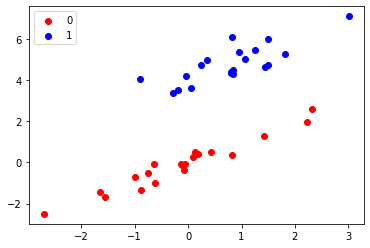

In [8]:
plt.scatter(features[:, 1][:num_data], features[:, 2][:num_data], c = 'r', label='0')
plt.scatter(features[:, 1][num_data:], features[:, 2][num_data:], c = 'b', label='1')

plt.legend()
plt.show()

In [9]:
# dataset shuffling
np.random.shuffle(dataset)

split_ratio = 0.7

# splitting dataset
train = dataset[0:int(split_ratio * (num_data * 2))]
test = dataset[int(split_ratio * (num_data * 2)):(num_data * 2)]

print(train.shape, test.shape)

(28, 4) (12, 4)


In [10]:
# reshaping data
x_train = train[:, 0:3]
y_train = train[:, 3]

x_test = test[:, 0:3]
y_test = test[:, 3]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(28, 3) (28,)
(12, 3) (12,)


In [11]:
print(x_train[0])
print(y_train[0])

[1.         0.23447622 4.74923944]
1.0


In [12]:
# Todo: practice 1
def train_perceptron(w, x, y, epoch=30):                        
   
    for i in range(epoch):#epoch만큼 실행
       
        for j in range(len(y)):#train(test) set의 크기
            temp=0
            if y[j]==0:
                temp=-1#label이 0일때는 -1을 곱해준다.
            else:
                temp=y[j]
            #temp: y값
            temp2=w.dot(x[j]*temp) #wtyx
            
            if temp2<0:#error
                
                w=w+x[j]*temp#yx를 더해서 w update
                
                
  
       
            
    
    return w

In [13]:
# w 와 x1 을 이용해 x2 값을 구함

def x2(x1, w):
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    x2 = []
    for i in range(len(x1 - 1)):
        x2_temp = (-w0 -w1 * x1[i]) / w2
        x2.append(x2_temp)
    return x2

# visualizaing decision boundary

def show_plt(w, class_data, labels):
#   w and class_data are 2-element with no bias, and 3-element with bias
    len_w = len(w)
    sh_data = class_data.shape
    if len_w != sh_data[1]:
        print('error: w and data dimension does not match')
        return
    
    if len_w == 3:
        class_data = class_data[:,1:]
        
    min = np.min(class_data[:, 0])
    max = np.max(class_data[:, 0])
    
    x1 = np.linspace(min, max, 100)
    x1 = x1.reshape(len(x1),1)
    x_2 = np.asarray(x2(x1, w))
    
    data_zeros = class_data[labels == 0]
    data_ones = class_data[labels == 1]
    
    plt.scatter(data_zeros[:, 0], data_zeros[:, 1], c = 'r', label='0')
    plt.scatter(data_ones[:, 0], data_ones[:, 1], c = 'b', label='1')
    plt.plot(x1, x_2)

    plt.legend()
    plt.show()
    

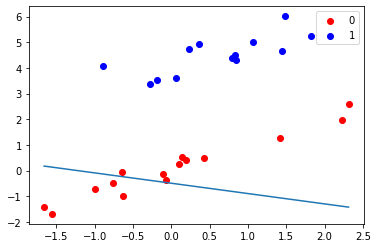

In [14]:
w = np.random.rand(len(x_train[0]))


show_plt(w, x_train, y_train)

In [15]:
w = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change
lab1_student_answer_w = w

The weights are: [-3.65532584 -1.99456841  2.80502338]


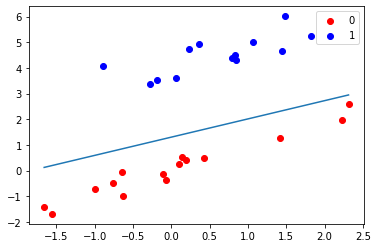

In [16]:
show_plt(w, x_train, y_train)

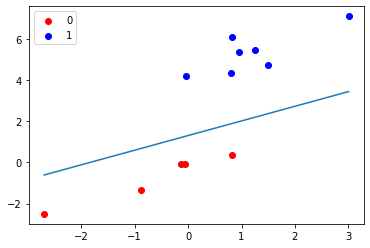

In [17]:
show_plt(w, x_test, y_test)

## Practice 2

hyperplane이 구해지는 최소 epoch를 출력할 수 있도록 train_perceptron 코드를 수정하시오.

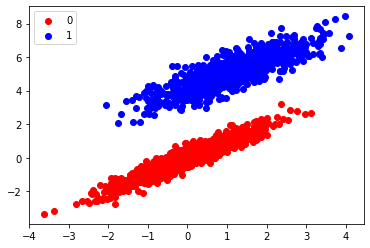

In [18]:
num_data = 1000

class_zeros = np.random.multivariate_normal(mean=[0,0], cov=[[1.,.95],[.95,1.]], size=num_data)
class_ones = np.random.multivariate_normal(mean=[1,5], cov=[[1.,.85],[.85,1.]], size=num_data)

biases = np.ones((2 * num_data, 1))

class_data = np.vstack((class_zeros, class_ones)).astype(np.float32)

features = np.hstack((biases, class_data))

label_zeros = np.zeros((num_data, 1))
label_ones = np.ones((num_data, 1))

labels = np.vstack((label_zeros, label_ones))
dataset = np.hstack((features,labels))

plt.scatter(features[:, 1][:num_data], features[:, 2][:num_data], c = 'r', label='0')
plt.scatter(features[:, 1][num_data:], features[:, 2][num_data:], c = 'b', label='1')

plt.legend()
plt.show()

In [19]:
np.random.shuffle(dataset)

split_ratio = 0.7

train = dataset[0:int(split_ratio * (num_data * 2))]
test = dataset[int(split_ratio * (num_data * 2)):(num_data * 2)]

x_train = train[:, 0:3]
y_train = train[:, 3]

x_test = test[:, 0:3]
y_test = test[:, 3]


# Todo: practice 2
def train_perceptron(w, x, y, epoch=30):
    min_epoch = epoch#초기값
    flag=True
    for i in range(epoch):
       
        for j in range(len(y)):#train(test) set의 크기
            temp=0
            if y[j]==0:
                temp=-1
            else:
                temp=y[j]
            #temp: y값
            temp2=w.dot(x[j]*temp) #wtyx
            
            if temp2<0:#error
                
                w=w+x[j]*temp#yx를 더해서 w update
                flag=False
                
        if flag and min_epoch==epoch:# w값이 update되지 않고 min_epoch가 초기값
            min_epoch=i+1 #for loop 가 i+1 번 수행된 상태
        else:
            flag=True
                
    #print(min_epoch)
    return w, min_epoch

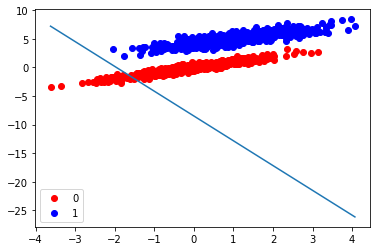

In [20]:
w = np.random.rand(len(x_train[0]))

show_plt(w, x_train, y_train)

The weights are: [-10.15517678  -8.34916775   9.32097236]


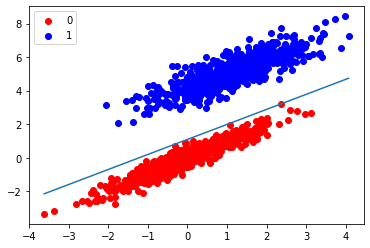

In [21]:
w, min_epoch = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change -->
lab1_student_answer_w2 = w
lab1_stduent_answer_min_epoch = min_epoch
# <--
show_plt(w, x_train, y_train)

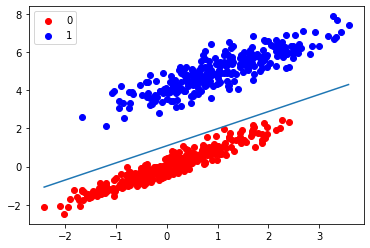

In [22]:
show_plt(w, x_test, y_test)

## Practice 3

hyperplane이 구해지는 최소 epoch를 줄일 수 있도록 train_perceptron 코드를 수정하시오.

In [31]:
# Todo: practice 3
def train_perceptron(w, x, y, epoch=30):
    min_epoch = epoch #초기값
    flag=True
    for i in range(epoch):
       
        for j in range(len(y)):#train(test) set의 크기
            temp=0
            if y[j]==0:
                temp=-1
            else:
                temp=y[j]
            #temp: y값
            temp2=w.dot(x[j]*temp) #wtyx
            
            if temp2<0:#error
                w=w+x[j]*temp/np.linalg.norm(x[j])#yx를 더해서 w update,
                #이때 각 입력 벡터가 가중치에 미치는 영향이 동일한 크기가 되도록 x벡터를 x[j]의 size로 나눈 값(단위벡터가 되도록)을 더한다
                flag=False
                
        if flag and min_epoch==epoch:# w값이 update되지 않고 min_epoch가 초기값
            min_epoch=i+1 #for loop 가 i+1 번 수행된 상태
        else:
            flag=True
                
    #print(min_epoch)
    return w, min_epoch


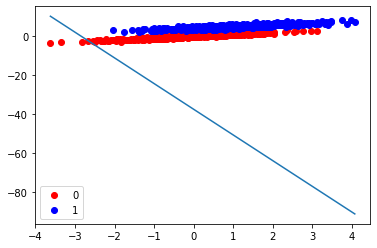

In [24]:
w = np.random.rand(len(x_train[0]))

show_plt(w, x_train, y_train)

The weights are: [-1.26606375 -0.60976316  0.82646443]


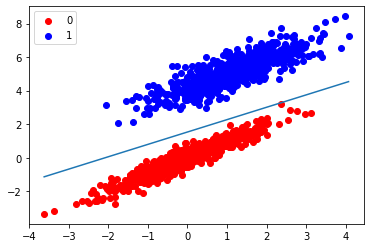

In [25]:
w, min_epoch = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change -->
lab1_student_answer_w3 = w
lab1_stduent_answer_min_epoch3 = min_epoch
# <--
show_plt(w, x_train, y_train)

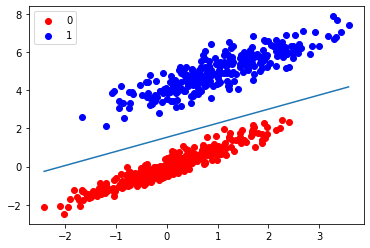

In [26]:
show_plt(w, x_test, y_test)

수고하셨습니다. 

조교메일: cvipsj@sogang.ac.kr

# 정답 확인용

수정금지 - 조교

In [27]:
print(f'학번: {lab1_student_id}')
print(f'이름: {lab1_student_name}')

학번: 20191571
이름: 김세영


In [28]:
print(f'Answer of practice 1: {abs(sum(lab1_student_answer_w - [-4.179, -2.512, 3.055])) < 0.01}')

Answer of practice 1: False


In [29]:
print(f'Answer of practice 2: {abs(sum(lab1_student_answer_w2 - [-6.628, -4.476, 5.423])) < 0.01}')
print(f'Min epochs at practice 2: {lab1_stduent_answer_min_epoch}')

Answer of practice 2: False
Min epochs at practice 2: 5


In [30]:
print(f'Answer of practice 2: {lab1_student_answer_w3}')
print(f'Min epochs at practice 2: {lab1_stduent_answer_min_epoch3}')

Answer of practice 2: [-1.26606375 -0.60976316  0.82646443]
Min epochs at practice 2: 2
